
![alt text](NITI_Aayog_logo.png)
<br> 
> # Assignment: Gross Domestic Product (GDP) Analysis
<br>

**Please Enter the `csv path` below**

In [2]:
# Location used to store the csv File location
location = './'

#PartI-A: GDP Analysis of the Indian States
locationGSDP = location + 'StateWiseGDPCurrPriceYearly.csv'

#PartI-B: GDP Analysis of the Indian States
locationGDP = location + 'States/'

# Part-II: GDP and Education Dropout Rates
LocationEDU = location + 'State UT wise Average Annual Drop-Out Rate from 2012-13 to 2014-15.csv'

In [3]:
# import pandas, pd is an alias
import pandas as pd

# import numpy, np is an alias
import numpy as np

# import matplotlib.pyplot, plt is an alias
import matplotlib.pyplot as plt
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns

# import glob function To Match Path, Directory, File Names 
import glob


> # Part I-A:

> ## 1. `Remove the rows:` '(% Growth over the previous year)' and 'GSDP - CURRENT PRICES (\` in Crore\`) for the year 2016-17.

In [4]:
# Perform read CSV PartI-A: GDP Analysis of the Indian States
df_GSDP = pd.read_csv(locationGSDP, sep=",", encoding = "utf-8")

# remove Year 2016-17 from dataframe
df_GSDP = df_GSDP[df_GSDP['Duration'] != '2016-17']

df_GSDP.head()


,Items Description,Duration,Andhra Pradesh,Arunachal Pradesh,Assam,Bihar,Chhattisgarh,Goa,Gujarat,Haryana,...,Telangana,Tripura,Uttar Pradesh,Uttarakhand,West Bengal1,Andaman & Nicobar Islands,Chandigarh,Delhi,Puducherry,All_India GDP
0,GSDP - CURRENT PRICES (` in Crore),2011-12,379402.0,11063.0,143175.0,247144.0,158074.0,42367.0,615606.0,297539.0,...,359433.0,19208.0,724049.0,115523.0,NaN,3979.0,18768.0,343767.0,16818.0,8736039.0
1,GSDP - CURRENT PRICES (` in Crore),2012-13,411404.0,12547.0,156864.0,282368.0,177511.0,38120.0,724495.0,347032.0,...,401493.0,21663.0,822903.0,131835.0,NaN,4421.0,21609.0,391238.0,18875.0,9946636.0
2,GSDP - CURRENT PRICES (` in Crore),2013-14,464272.0,14602.0,177745.0,317101.0,206690.0,35921.0,807623.0,400662.0,...,452186.0,25593.0,944146.0,149817.0,NaN,5159.0,24787.0,443783.0,21870.0,11236635.0
3,GSDP - CURRENT PRICES (` in Crore),2014-15,526468.0,16761.0,198098.0,373920.0,234982.0,40633.0,895027.0,437462.0,...,511178.0,29667.0,1043371.0,161985.0,NaN,5721.0,27844.0,492424.0,24089.0,12433749.0
4,GSDP - CURRENT PRICES (` in Crore),2015-16,609934.0,18784.0,224234.0,413503.0,260776.0,45002.0,994316.0,485184.0,...,575631.0,NaN,1153795.0,184091.0,NaN,NaN,30304.0,551963.0,26533.0,13675331.0


> ## 2. Calculate the average growth of states for the duration 2013-14, 2014-15 and 2015-16 by taking the mean of the row '(% Growth over previous year)'. Compare the calculated values and plot them for the states. Make appropriate transformations, if necessary, to plot the data. Report the average growth rates of the various states:


> ### 2.1. Which states have been growing consistently fast, and which ones have been struggling?
> 
> **Fast States:**
>  
> * Mizoram
> * Tripura
> * Nagaland 
> * Manipur
> * Arunachal Pradesh 
> * Karnataka 
>

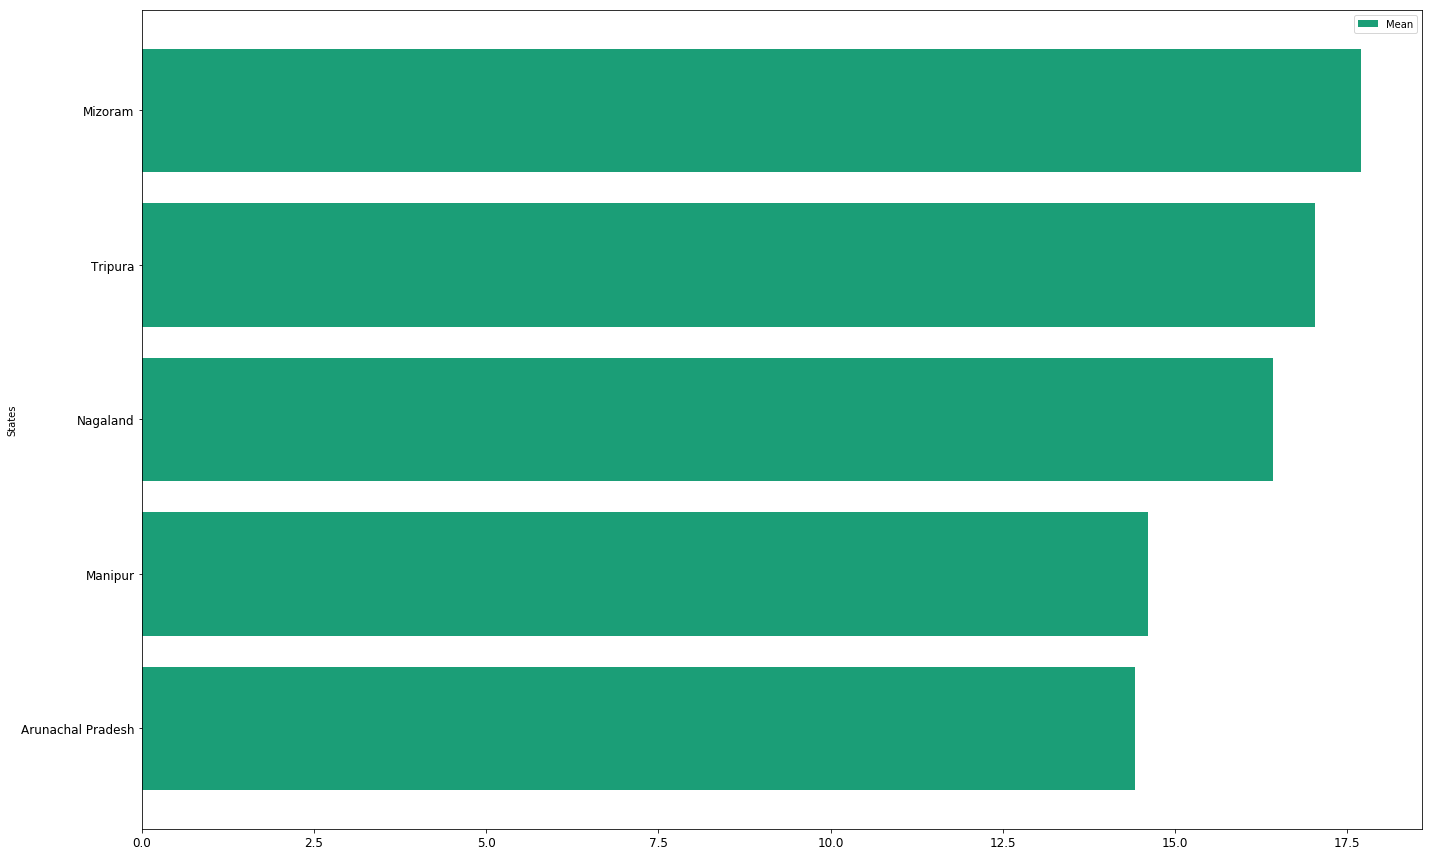

None
                        Mean
States                      
Arunachal Pradesh  14.413333
Manipur            14.610000
Nagaland           16.415000
Tripura            17.030000
Mizoram            17.700000


In [5]:

# converting in to 1-D by moving Column States to Rows 
df_GSDP_Flat = df_GSDP.melt(id_vars = ["Items  Description","Duration"], var_name="States", value_name="GSD_Growth")

# Removing States All_Ind GDP and West Bengal1
remove_state = ['All_India GDP','West Bengal1']
df_GSDP_Flat = df_GSDP_Flat[~df_GSDP_Flat['States'].isin(remove_state)]

# creating list to store the Item Description
itemDesc = ['(% Growth over previous year)']

# creating list to store the Durations
lstDuration = ['2013-14', '2014-15','2015-16']

# Add column 'Mean Filtered Durtion' and perform calcualting Mean for listed Duration
df_GSDP_Flat['Mean'] = df_GSDP_Flat[df_GSDP_Flat['Duration'].isin(lstDuration) & df_GSDP_Flat['Items  Description'].isin(itemDesc)].groupby(['States'])[['GSD_Growth']].transform(np.mean)

# Filtering the Durations, Item Description  and removing duplicates
df_GSDP_Flat_21 =df_GSDP_Flat[df_GSDP_Flat['Duration'].isin(lstDuration)& df_GSDP_Flat['Items  Description'].isin(itemDesc)]
df_GSDP_Flat_21 = df_GSDP_Flat[["States","Mean"]].groupby(['States']).agg('max')


#sorting dataframe ascending order based on Mean value
df_GSDP_Flat_21 = df_GSDP_Flat_21.sort_values('Mean', ascending=False)
df_GSDP_Flat_21 = df_GSDP_Flat_21.head(5).sort_values('Mean', ascending=True)

# Plot bar Chart
df_GSDP_Flat_21.plot(kind='barh', sharey=False, sharex=True, subplots=False, legend=True, width=0.8, layout=(3,2), fontsize=12, grid=False, figsize=(20,12), colormap='Dark2')
plt.tight_layout()

print(plt.show())
print(df_GSDP_Flat_21)


>
> **Struggling States:** 
> * Goa
> * Meghalaya
> * Odisha
> * Sikkim
> * Jammu & Kashmir
>

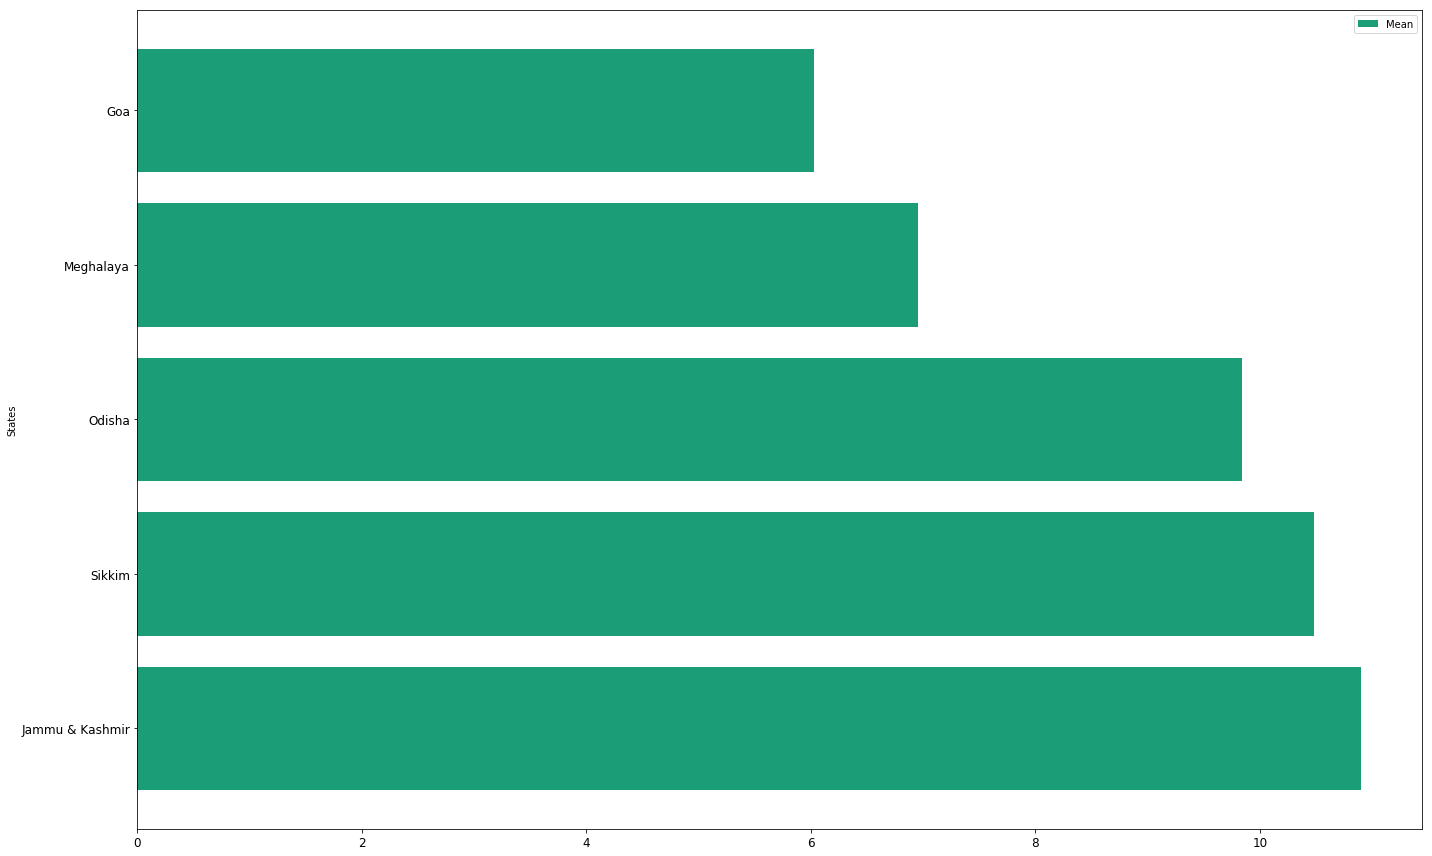

None
                      Mean
States                    
Jammu & Kashmir  10.900000
Sikkim           10.486667
Odisha            9.836667
Meghalaya         6.953333
Goa               6.033333


In [6]:
# Filtering the Durations, Item Description  and removing duplicates
df_GSDP_Flat_22 =df_GSDP_Flat[df_GSDP_Flat['Duration'].isin(lstDuration)& df_GSDP_Flat['Items  Description'].isin(itemDesc)]
df_GSDP_Flat_22 = df_GSDP_Flat[["States","Mean"]].groupby(['States']).agg('max')

#sorting dataframe ascending order based on Mean value
df_GSDP_Flat_22 = df_GSDP_Flat_22.sort_values('Mean', ascending=False).tail(5)

# Plot bar Chart
df_GSDP_Flat_22.plot(kind='barh', sharey=False, sharex=True, subplots=False, legend=True, width=0.8, layout=(3,2), fontsize=12, grid=False, figsize=(20,12), colormap='Dark2')
plt.tight_layout()

print(plt.show())
print(df_GSDP_Flat_22)

> ### 2.2 Curiosity exercise: What has been the average growth rate of your home state, and how does it compare to the national average over this duration?
>
> **Home State:** has `1% Average Growth` compare with national average
>

In [7]:
# creating list to store the Item Description
itemDesc = ['(% Growth over previous year)']

#Calcuate Growth Rate of Home State
state=['Tamil Nadu']

df_GSDP_Flat_23 = df_GSDP_Flat.sort_values('Mean', ascending=True) 

#Calcualte Mean for All States
df_GSDP_Flat_23['All States Mean'] = df_GSDP_Flat_23[df_GSDP_Flat_23['Duration'].isin(lstDuration) & df_GSDP_Flat_23['Items  Description'].isin(itemDesc)].groupby(['Items  Description'])[['GSD_Growth']].transform(np.mean)

avgGrowth = np.divide(df_GSDP_Flat_23['Mean'],df_GSDP_Flat_23['All States Mean'])
df_GSDP_Flat_23.insert(6,'Avg Growth',avgGrowth)

#Filter Homw town State
df_GSDP_Flat_23 = df_GSDP_Flat_23[df_GSDP_Flat_23['States'].isin(state)& df_GSDP_Flat_23['Items  Description'].isin(itemDesc)& df_GSDP_Flat_23['Duration'].isin(lstDuration)]

df_GSDP_Flat_23 = df_GSDP_Flat_23[["States","Mean","All States Mean","Avg Growth"]].groupby(['States']).agg('max')
df_GSDP_Flat_23

,Mean,All States Mean,Avg Growth
States,,,
Tamil Nadu,12.336667,12.246782,1.007339


> ## 3. Plot the total GDP of the states for the year 2015-16:
>
>

In [8]:
# creating list to store the Durations
lstDuration = ['2015-16']

# creating list to store the Item Description
itemDesc = ['GSDP - CURRENT PRICES (` in Crore)']

# Filter Data Set for GSDP and 2015-16
df_GSDP_Flat_3 = df_GSDP_Flat[df_GSDP_Flat['Duration'].isin(lstDuration) & df_GSDP_Flat['Items  Description'].isin(itemDesc)]

# Perform max to select States and GDP Columns for plotting purpose
df_GSDP_Flat_3 = df_GSDP_Flat_3[["States","GSD_Growth"]].groupby(['States']).agg('max')

# Show top 5
df_GSDP_Flat_3.head(5)


,GSD_Growth
States,
Andaman & Nicobar Islands,NaN
Andhra Pradesh,609934.0
Arunachal Pradesh,18784.0
Assam,224234.0
Bihar,413503.0


>
> ### 3.1 Identify the top 5 states based on total GDP.
>
> **Top 5 States based on Total GDP :** 
> * Tamil Nadu
> * Uttar Pradesh
> * Karnataka
> * Gujarat
> * Andra Pradesh
>

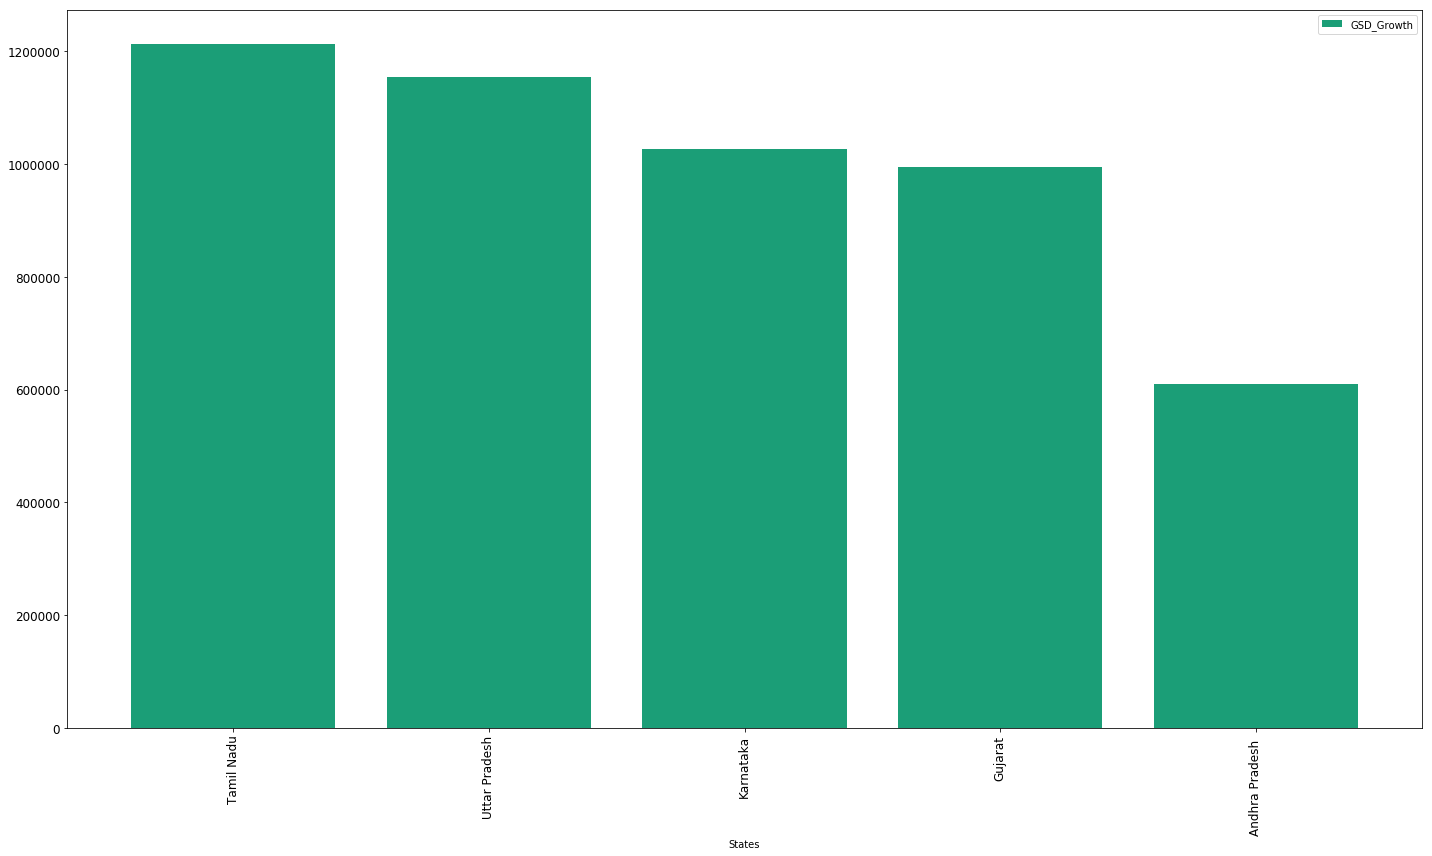

None
                 GSD_Growth
States                     
Tamil Nadu        1212668.0
Uttar Pradesh     1153795.0
Karnataka         1027068.0
Gujarat            994316.0
Andhra Pradesh     609934.0


In [9]:
# Sort GSD_Growth desending to show top 5
df_GSDP_Flat_31 = df_GSDP_Flat_3.sort_values('GSD_Growth', ascending=False).head(5)

# Plot bar Chart
df_GSDP_Flat_31.plot(kind='bar', sharey=False, sharex=True, subplots=False, legend=True, width=0.8, layout=(3,2), fontsize=12, grid=False, figsize=(20,12), colormap='Dark2')
plt.tight_layout()

print(plt.show())
print(df_GSDP_Flat_31)

> 
> ### 3.2 Identify the bottom 5 States based on total GDP 
>
> **Bottom 5 States based on Total GDP :** 
> * Sikkim
> * Arunachal Pradesh
> * Puducherry
> * Meghalay
> * Chandigarh

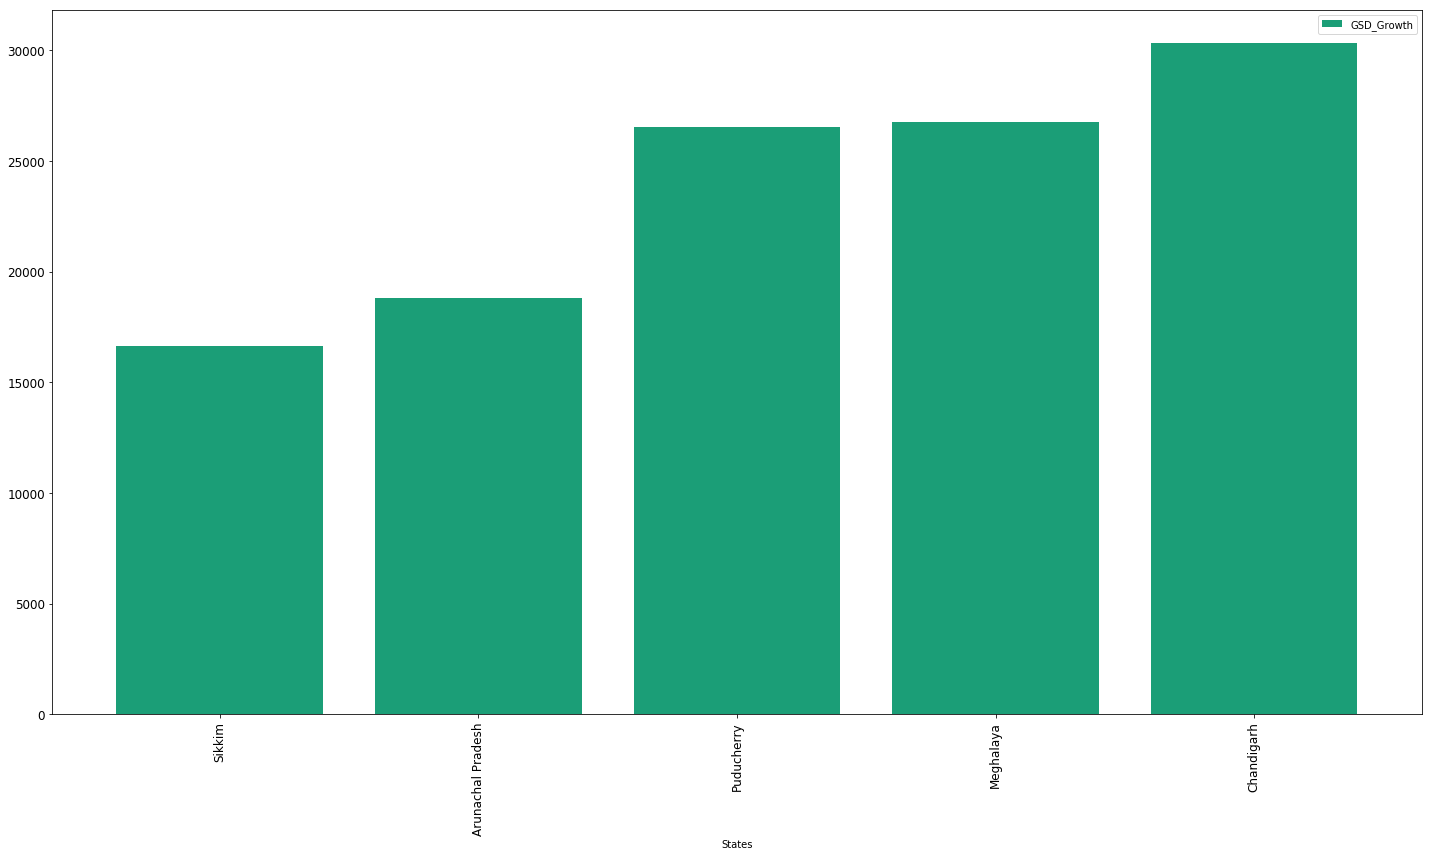

None
                   GSD_Growth
States                       
Sikkim                16637.0
Arunachal Pradesh     18784.0
Puducherry            26533.0
Meghalaya             26745.0
Chandigarh            30304.0


In [10]:
# Sort GSD_Growth ascending to show bottom 5
df_GSDP_Flat_32 = df_GSDP_Flat_3.sort_values('GSD_Growth', ascending=True).head(5)

# Plot bar Chart
df_GSDP_Flat_32.plot(kind='bar', sharey=False, sharex=True, subplots=False, legend=True, width=0.8, layout=(3,2), fontsize=12, grid=False, figsize=(20,12), colormap='Dark2')
plt.tight_layout()

print(plt.show())
print(df_GSDP_Flat_32)


>
> # Part I-B:
>

>
> ## Data Prepration
>

In [11]:
# Creating Empty List
filename=[]

#Adding Path /States and *.CSV files
locationGDPcsv = locationGDP+"/*.csv"

#Assining the location file search outoput to all_Files
all_Files = glob.glob(locationGDPcsv)

# converting all_Files output in list
for files in all_Files:
    if files.endswith(".csv"):
        filename.append(files)
filename

['./States/NAD-Rajasthan-GSVA_cur_2014-15.csv',
 './States/NAD-Telangana-GSVA_cur_2016-17.csv',
 './States/NAD-Odisha-GSVA_cur_2016-17.csv',
 './States/NAD-Assam-GSVA_cur_2015-16.csv',
 './States/NAD-Bihar-GSVA_cur_2015-16.csv',
 './States/NAD-Nagaland-GSVA_cur_2014-15.csv',
 './States/NAD-Goa-GSVA_cur_2015-16.csv',
 './States/NAD-Kerala-GSVA_cur_2015-16.csv',
 './States/NAD-Madhya_Pradesh-GSVA_cur_2016-17.csv',
 './States/NAD-Mizoram-GSVA_cur_2014-15.csv',
 './States/NAD-Chhattisgarh-GSVA_cur_2016-17.csv',
 './States/NAD-Arunachal_Pradesh-GSVA_cur_2015-16.csv',
 './States/NAD-Manipur-GSVA_cur_2014-15.csv',
 './States/NAD-Tripura-GSVA_cur_2014-15.csv',
 './States/NAD-Meghalaya-GSVA_cur_2016-17.csv',
 './States/NAD-Punjab-GSVA_cur_2014-15.csv',
 './States/NAD-Haryana-GSVA_cur_2016-17.csv',
 './States/NAD-Uttar_Pradesh-GSVA_cur_2015-16.csv',
 './States/NAD-Andhra_Pradesh-GSVA_cur_2016-17.csv',
 './States/NAD-Delhi-GSVA_cur_2016-17.csv',
 './States/NAD-Tamil_Nadu-GSVA_cur_2016-17.csv',
 '

>
> ## Merging Files and Cleaning Data
>

In [12]:
def mergeFiles(fnme):
    locationGDPMerge =  fnme
    df_GDP_Merge = pd.read_csv(locationGDPMerge,sep=",", encoding = "iso-8859-1", header=0)
    
    #Insert State Column based on File Name Split
    state=fnme.split("-")[1].replace("_"," ")
    df_GDP_Merge.insert(0,'States',state)
    
    #Convert S.No. Column from String into Integer
    df_GDP_Merge['S.No.'] = np.where((df_GDP_Merge['Item'] == 'Primary') & (df_GDP_Merge['S.No.'] == 'Total'),'2.5',
                                   np.where((df_GDP_Merge['Item'] == 'Secondary') & (df_GDP_Merge['S.No.'] == 'Total'),'5.5',
                                            np.where((df_GDP_Merge['Item'] == 'Tertiary') & (df_GDP_Merge['S.No.'] == 'Total'),'11.5',
                                                     df_GDP_Merge['S.No.'])))
    df_GDP_Merge['S.No.'] = df_GDP_Merge['S.No.'].astype(float)
    df_GDP_Merge['S.No.'] = df_GDP_Merge['S.No.'].values * 10
    df_GDP_Merge['S.No.'] = df_GDP_Merge['S.No.'].astype(int)
    
    #Insert Categorical Column Sector: Primary, Secondary, Teritary and Others
    Sector= np.where(df_GDP_Merge['S.No.'] <= 25,"Primary",
                                  np.where((df_GDP_Merge['S.No.'] > 26) & (df_GDP_Merge['S.No.'] <= 55),"Seconday",
                                           np.where((df_GDP_Merge['S.No.'] > 55) & (df_GDP_Merge['S.No.'] <= 115),"Teritary","Others")))
    df_GDP_Merge.insert(1,'Sector',Sector)
    
    #Insert Categorical Column Sub Sector
    subSector = np.where(df_GDP_Merge['S.No.'] < 20,"Agriculture, forestry and fishing",
                         np.where((df_GDP_Merge['S.No.'] >= 20) & (df_GDP_Merge['S.No.'] < 30),"Mining and quarrying",
                                  np.where((df_GDP_Merge['S.No.'] >= 30) & (df_GDP_Merge['S.No.'] < 40),"Manufacturing",
                                           np.where((df_GDP_Merge['S.No.'] >=40) & (df_GDP_Merge['S.No.'] <50),"Electricity, gas, water supply & other utility services",
                                                    np.where((df_GDP_Merge['S.No.'] >=50) & (df_GDP_Merge['S.No.'] <60),"Construction",
                                                             np.where((df_GDP_Merge['S.No.'] >=60) & (df_GDP_Merge['S.No.'] <70),"Trade, repair, hotels and restaurants",
                                                                      np.where((df_GDP_Merge['S.No.'] >=70) & (df_GDP_Merge['S.No.'] <80),"Transport, storage, communication & services related to broadcasting",
                                                                               np.where((df_GDP_Merge['S.No.'] >=80) & (df_GDP_Merge['S.No.'] <90),"Financial services",
                                                                                        np.where((df_GDP_Merge['S.No.'] >=90) & (df_GDP_Merge['S.No.'] <100),"Real estate, ownership of dwelling & professional services",
                                                                                                 np.where((df_GDP_Merge['S.No.'] >=100) & (df_GDP_Merge['S.No.'] <110),"Public administration",
                                                                                                          np.where((df_GDP_Merge['S.No.'] >=110) & (df_GDP_Merge['S.No.'] <120),"Other services",
                                                                                                                   np.where(df_GDP_Merge['S.No.'] >=120,df_GDP_Merge['Item'],"NaN"))))))))))))
    df_GDP_Merge.insert(2,'Sub Sector',subSector)
    
    return df_GDP_Merge

In [13]:
#Merge all States file into one dataframe
df_GDP=[mergeFiles(fname) for fname in filename]
df_GDP_Concat = pd.concat(df_GDP, sort=False)

# converting in to 1-D by moving Column Duration to Rows 
df_GDP_Flat = df_GDP_Concat.melt(id_vars = ["States","Sector","Sub Sector","S.No.","Item"], var_name="Duration", value_name="GDP")
df_GDP_Concat.head()

,States,Sector,Sub Sector,S.No.,Item,2011-12,2012-13,2013-14,2014-15,2015-16,2016-17
0,Rajasthan,Primary,"Agriculture, forestry and fishing",10,"Agriculture, forestry and fishing",11910650.0,13572561.0,14418664.0,15044394.0,NaN,NaN
1,Rajasthan,Primary,"Agriculture, forestry and fishing",11,Crops,7346942.0,8389344.0,8675414.0,7673441.0,NaN,NaN
2,Rajasthan,Primary,"Agriculture, forestry and fishing",12,Livestock,3113617.0,3523365.0,3962174.0,5356257.0,NaN,NaN
3,Rajasthan,Primary,"Agriculture, forestry and fishing",13,Forestry and logging,1416986.0,1622443.0,1738606.0,1956660.0,NaN,NaN
4,Rajasthan,Primary,"Agriculture, forestry and fishing",14,Fishing and aquaculture,33105.0,37408.0,42470.0,58036.0,NaN,NaN


> ## 1. Perform the analysis only for the duration 2014-15. 
>
> ## 2. Filter out the union territories (Delhi, Chandigarh, Andaman and Nicobar Islands, etc.) for further analysis, as they are governed directly by the centre, not state governments.
>

In [14]:
# Filtering data for the Duration 2014-15
duration = ['2014-15']

# Assigning all Union Territories to variable Union Territories
unionTerritories = ['Delhi','Chandigarh','Andaman and Nicobar Islands','Daman and Diu', 'Dadra and Nagar Haveli','Puducherry','Lakshadweep']

# Filtering States that are not part of Union Territories and Duration 
df_GDP_Flat = df_GDP_Flat[df_GDP_Flat['Duration'].isin(duration)]
df_GDP_Flat = df_GDP_Flat[~df_GDP_Flat['States'].isin(unionTerritories)] 

df_GDP_Flat.head()

,States,Sector,Sub Sector,S.No.,Item,Duration,GDP
2970,Rajasthan,Primary,"Agriculture, forestry and fishing",10,"Agriculture, forestry and fishing",2014-15,15044394.0
2971,Rajasthan,Primary,"Agriculture, forestry and fishing",11,Crops,2014-15,7673441.0
2972,Rajasthan,Primary,"Agriculture, forestry and fishing",12,Livestock,2014-15,5356257.0
2973,Rajasthan,Primary,"Agriculture, forestry and fishing",13,Forestry and logging,2014-15,1956660.0
2974,Rajasthan,Primary,"Agriculture, forestry and fishing",14,Fishing and aquaculture,2014-15,58036.0


>
> ## 3. Plot the GDP per capita for all the states.
>

>
> ### 3.1 Identify the top 5 States based on the GDP per capita.
>
> **Top 5 States:** 
> * Maharashtra
> * Tamil Nadu
> * Uttar Pradesh
> * Karnataka
> * Gujarat
>

                       GDP
States                    
Maharashtra    179212165.0
Tamil Nadu     109256373.0
Uttar Pradesh  104337115.0
Karnataka       92178806.0
Gujarat         89502727.0


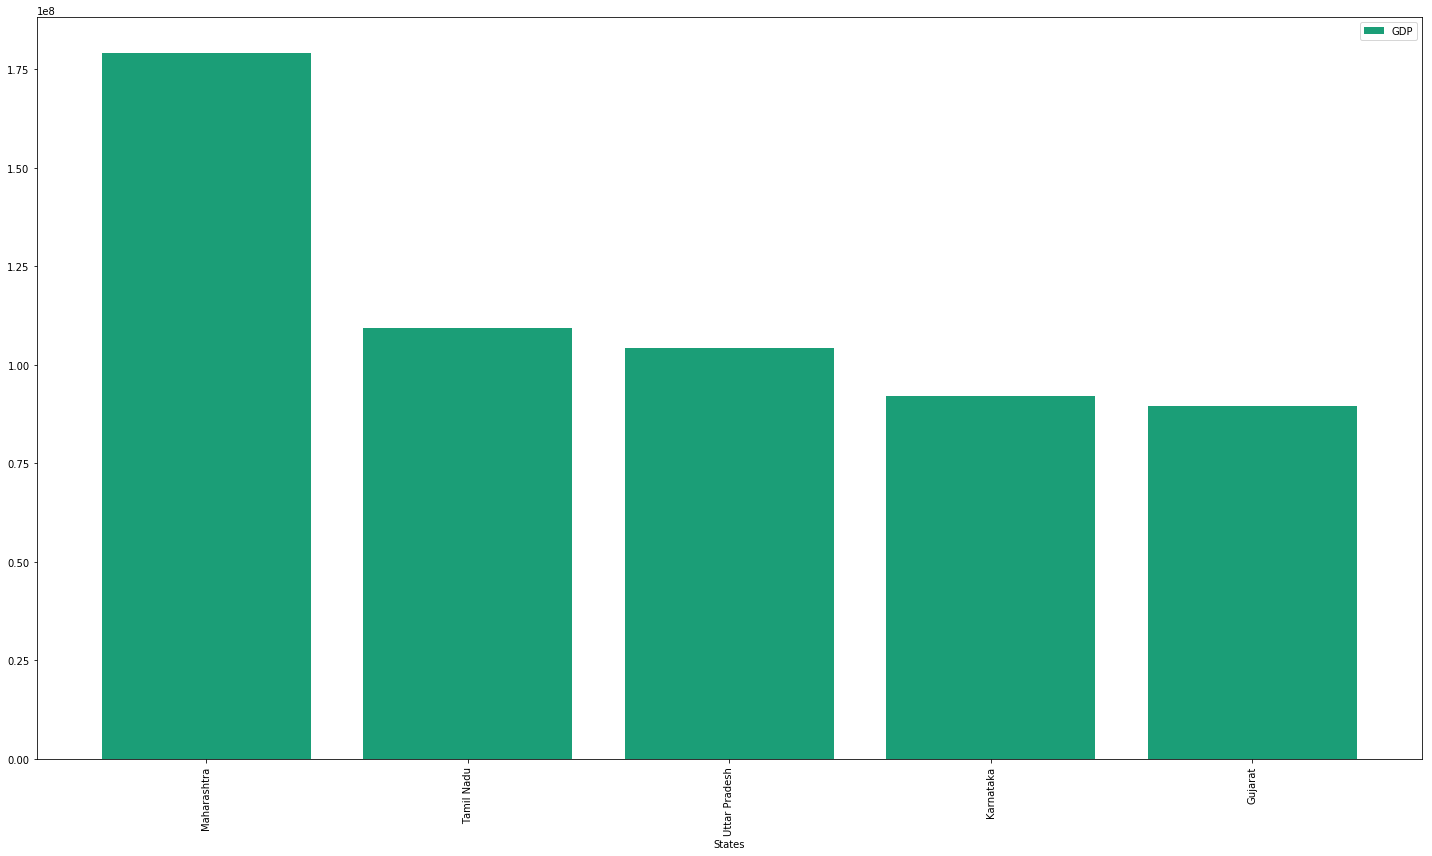

None


In [15]:
# Assigning GDP to variable Item for filteration purpose
item = ['Gross State Domestic Product']

# Filter GDP only from the Data Set
df_GDP_Flat_3 = df_GDP_Flat[df_GDP_Flat['Item'].isin(item)]

#perform max to select States and GDP Columns for plotting purpose
df_GDP_Flat_31 = df_GDP_Flat_3[["States","GDP"]].groupby(['States']).agg('max')


# Perform sort order descending to show Top 5
df_GDP_Flat_31 = df_GDP_Flat_31.sort_values('GDP', ascending=False)
df_GDP_Flat_31 = df_GDP_Flat_31.head(5)

# Plot bar Chart
df_GDP_Flat_31.plot(kind='bar', sharey=False, sharex=True, subplots=False, legend=True, width=0.8, layout=(3,2), fontsize=10, grid=False, figsize=(20,12), colormap='Dark2')
plt.tight_layout()

print(df_GDP_Flat_31)
print(plt.show())


> ### 3.2 Identify the bottom 5 states based on the GDP per capita.
>
> **Bottom 5 States:** 
> * Mizoram
> * Sikkim
> * Arunachal Pradesh
> * Manipur
> * Nagaland
>

                         GDP
States                      
Mizoram            1155933.0
Sikkim             1520933.0
Arunachal Pradesh  1676119.0
Manipur            1804276.0
Nagaland           1841424.0


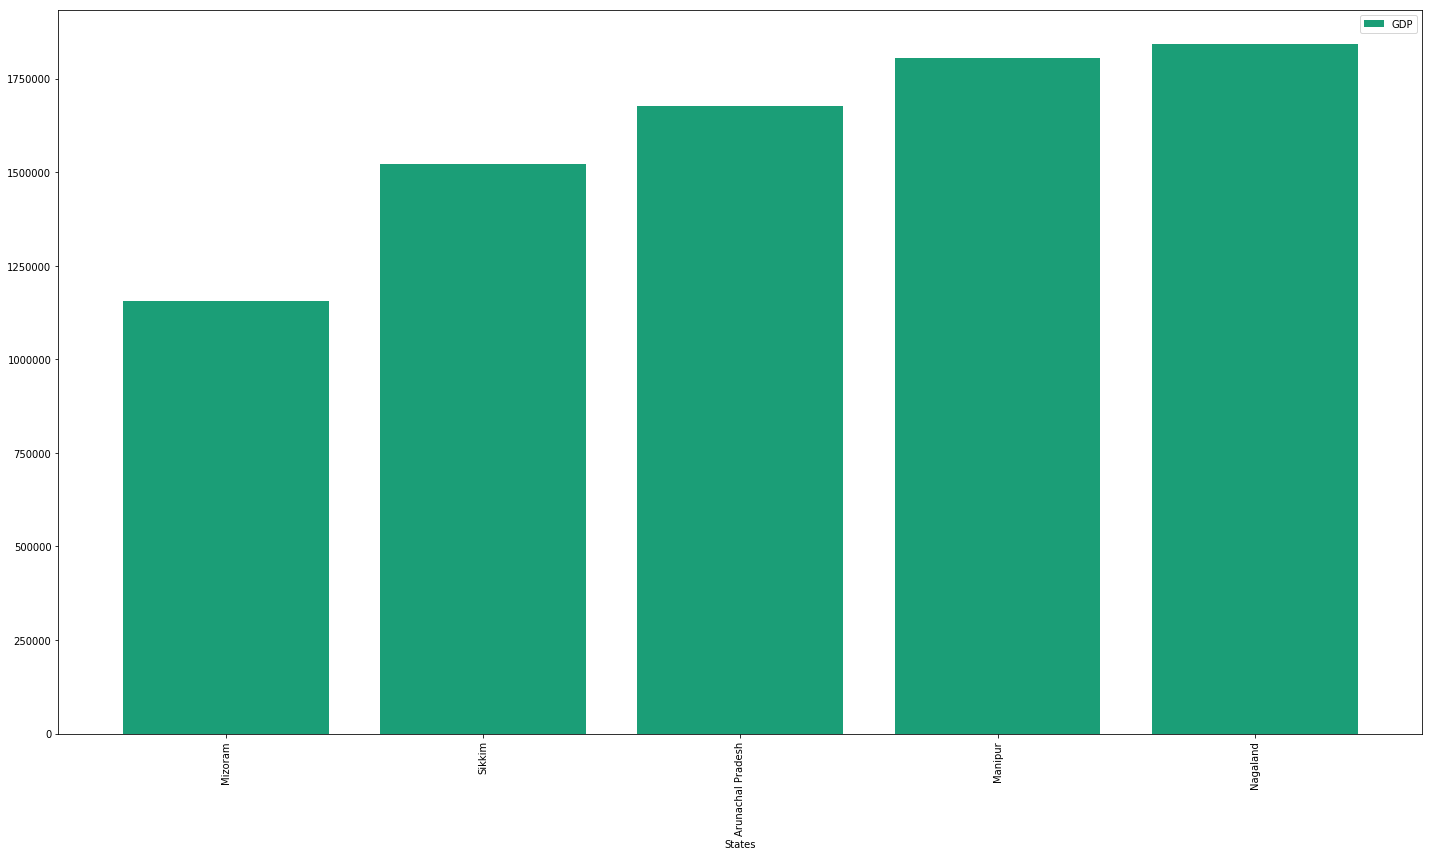

None


In [16]:
# Perform sort order descending to show Bottom 5
df_GDP_Flat_32 = df_GDP_Flat_3[["States","GDP"]].groupby(['States']).agg('max')
df_GDP_Flat_32 = df_GDP_Flat_32.sort_values('GDP', ascending=True)
df_GDP_Flat_32 = df_GDP_Flat_32.head(5)


# Plot bar Chart
df_GDP_Flat_32.plot(kind='bar', sharey=False, sharex=True, subplots=False, legend=True, width=0.8, layout=(3,2), fontsize=10, grid=False, figsize=(20,12), colormap='Dark2')
plt.tight_layout()

print(df_GDP_Flat_32)
print(plt.show())

>
> ### 3.3 Find the ratio of the highest per capita GDP to the lowest per capita GDP.
>
> The Ratio of the highest per captia GDP to the lowest per captia GDP is `[271793.] : [33954.] of 8%`
>

In [17]:
item = ['Per Capita GSDP (Rs.)']
ratioCaptia = 0

# Filter Per Captia GDP only from the Data Set
df_GDP_Flat_33 = df_GDP_Flat[df_GDP_Flat['Item'].isin(item)]

#perform max to select States and GDP Columns for plotting purpose
df_GDP_Flat_33 = df_GDP_Flat_33[["States","GDP"]].groupby(['States']).agg('max')

# High, Low annd Ratio calculation for Per Captia
highCaptia = df_GDP_Flat_33[["GDP"]].agg('max').values
lowCaptia = df_GDP_Flat_33[["GDP"]].agg('min').values
ratioCaptia = highCaptia / lowCaptia
print("The Ratio of the highest per captia GDP to the lowest per captia GDP is {0} : {1} of {2}%".format(highCaptia, lowCaptia, ratioCaptia))

The Ratio of the highest per captia GDP to the lowest per captia GDP is [271793.] : [33954.] of [8.00474171]%


>
> ## 4. Plot the percentage contribution of the primary, secondary and tertiary sectors as a percentage of the total GDP for all the states.
>

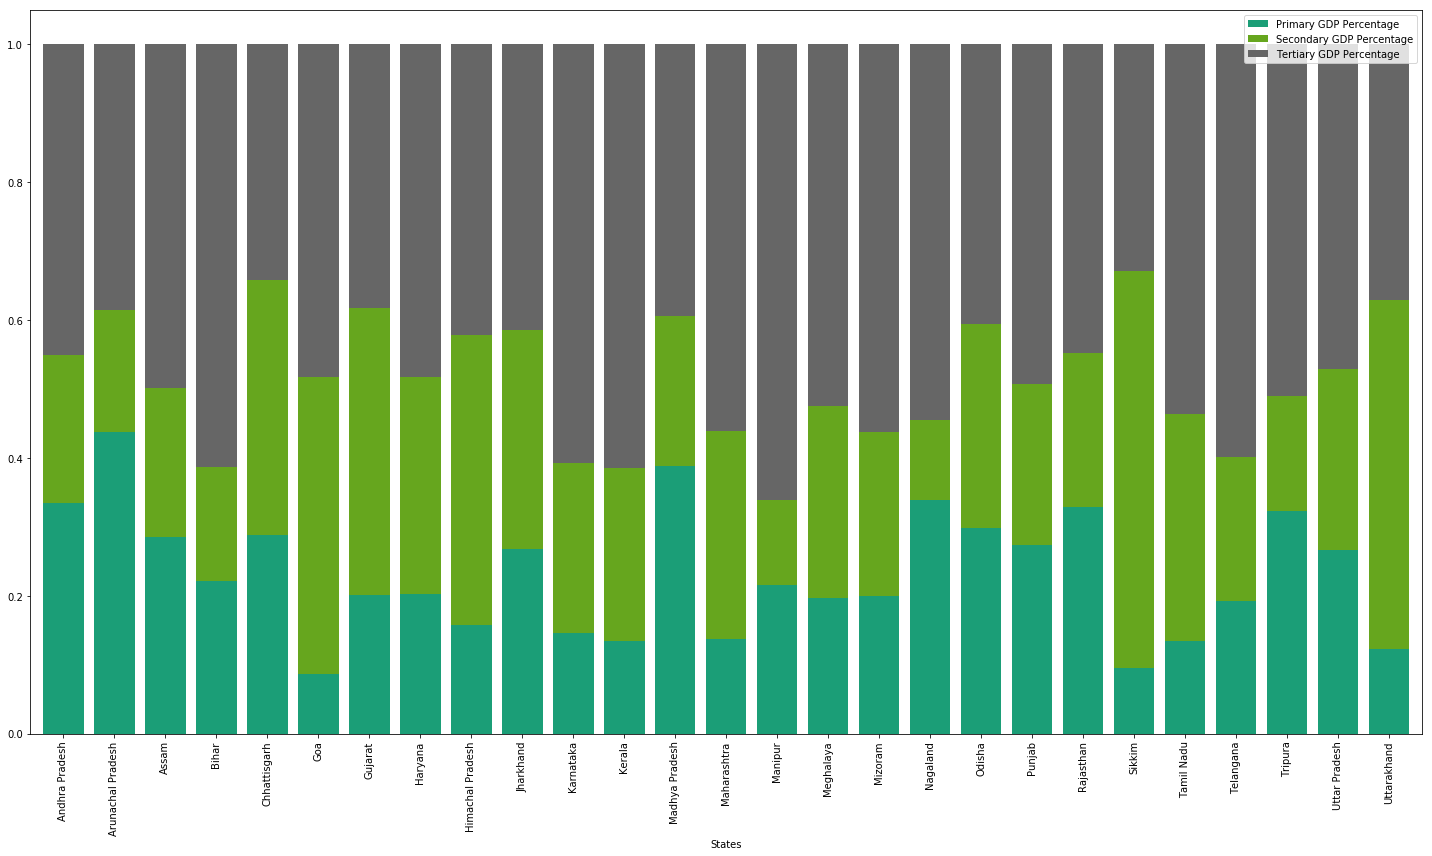

None
                   Primary GDP Percentage  Secondary GDP Percentage  \
States                                                                
Andhra Pradesh                   0.333918                  0.214824   
Arunachal Pradesh                0.438161                  0.175695   
Assam                            0.285355                  0.216056   
Bihar                            0.221640                  0.165398   
Chhattisgarh                     0.287956                  0.370645   
Goa                              0.086754                  0.430124   
Gujarat                          0.200770                  0.417327   
Haryana                          0.201877                  0.315388   
Himachal Pradesh                 0.157983                  0.420286   
Jharkhand                        0.267457                  0.318066   
Karnataka                        0.145305                  0.246677   
Kerala                           0.134543                  0.250243   
M

In [18]:
# Sector Filter list
item = ['Primary','Secondary','Tertiary','TOTAL GSVA at basic prices']

# Filter Per Captia GDP only from the Data Set
df_GDP_Flat_4 = df_GDP_Flat[df_GDP_Flat['Item'].isin(item)]
df_GDP_Flat_4 = df_GDP_Flat_4[['States','Item','GDP']]

#Creating Primary, Secondary, Tertiary and Total GDP
primary_GDP = np.where(df_GDP_Flat_4['Item']=='Primary',df_GDP_Flat_4['GDP'],0)
secondary_GDP = np.where(df_GDP_Flat_4['Item']=='Secondary',df_GDP_Flat_4['GDP'],0)
tertiary_GDP = np.where(df_GDP_Flat_4['Item']=='Tertiary',df_GDP_Flat_4['GDP'],0)
total_GDP = np.where(df_GDP_Flat_4['Item']=='TOTAL GSVA at basic prices',df_GDP_Flat_4['GDP'],0)

#Creating Primary, Secondary, Tertiary and Total GDP Columns
df_GDP_Flat_4.insert(3,'Primary GDP',primary_GDP)
df_GDP_Flat_4.insert(4,'Secondary GDP',secondary_GDP)
df_GDP_Flat_4.insert(5,'Tertiary GDP',tertiary_GDP)
df_GDP_Flat_4.insert(6,'TOTAL GDP',total_GDP)
df_GDP_Flat_41 = df_GDP_Flat_4[["States","Primary GDP","Secondary GDP","Tertiary GDP","TOTAL GDP"]].groupby(['States']).agg('max')

#Creating Primary, Secondary, Tertiary Percentage Columns
df_GDP_Flat_41['Primary GDP Percentage'] = df_GDP_Flat_41['Primary GDP']/df_GDP_Flat_41['TOTAL GDP']
df_GDP_Flat_41['Secondary GDP Percentage'] = df_GDP_Flat_41['Secondary GDP']/df_GDP_Flat_41['TOTAL GDP']
df_GDP_Flat_41['Tertiary GDP Percentage'] = df_GDP_Flat_41['Tertiary GDP']/df_GDP_Flat_41['TOTAL GDP']

#Deleting Irrelvant columns
df_GDP_Flat_41.drop(df_GDP_Flat_41.columns[3], axis=1, inplace=True)
df_GDP_Flat_41.drop(df_GDP_Flat_41.columns[2], axis=1, inplace=True)
df_GDP_Flat_41.drop(df_GDP_Flat_41.columns[1], axis=1, inplace=True)
df_GDP_Flat_41.drop(df_GDP_Flat_41.columns[0], axis=1, inplace=True)

# Plot bar Chart
df_GDP_Flat_41.plot(kind='bar', stacked=True, sharey=False, sharex=True, subplots=False, legend=True, width=0.8, layout=(3,2), fontsize=10, grid=False, figsize=(20,12), colormap='Dark2')
plt.tight_layout()

print(plt.show())
print(df_GDP_Flat_41)

>
> ## 5. Categorise the states into four groups based on the GDP per capita (C1, C2, C3, C4, where C1 would have the highest per capita GDP and C4, the lowest). The quantile values are (0.20,0.5, 0.85, 1), i.e., the states lying between the 85th and the 100th percentile are in C1; those between the 50th and the 85th percentiles are in C2, and so on.
>


> ### Category - C1: (4 States)
> * Goa
> * Haryana
> * Kerala
> * Sikkim
> 
> ### Category - C2: (9 States)
> * Arunachal Pradesh
> * Gujarat
> * Himachal Pradesh
> * Karnataka
> * Maharashtra
> * Punjab
> * Tamil Nadu
> * Telangana
> * Uttarakhand
> 
> ### Category - C3: (8 States)
> * Andhra Pradesh
> * Chhattisgarh
> * Meghalaya
> * Mizoram
> * Nagaland
> * Odisha
> * Rajasthan
> * Tripura
>
> ### Category - C4: (6 States)
> * Assam
> * Bihar
> * Jharkhand
> * Madhya Pradesh
> * Manipur
> * Uttar Pradesh

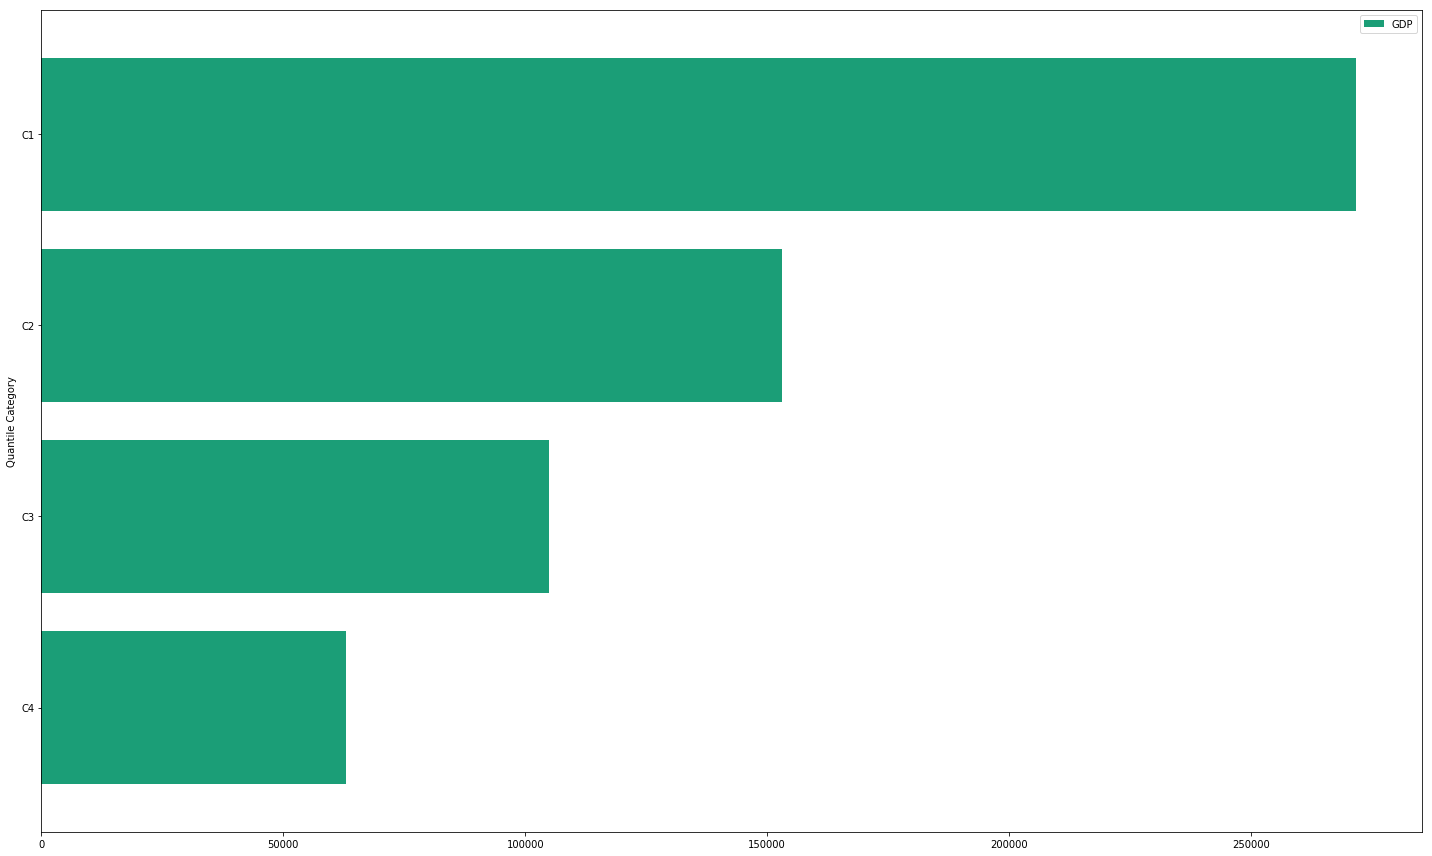

None
                        GDP
Quantile Category          
C4                  62989.0
C3                 104977.0
C2                 153076.0
C1                 271793.0


In [19]:
# Filter for GDP list
item = ['Per Capita GSDP (Rs.)']

# Filter Per Captia GDP only from the Data Set
df_GDP_Flat_5 = df_GDP_Flat[df_GDP_Flat['Item'].isin(item)]
df_GDP_Flat_5 = df_GDP_Flat_5[["States","GDP"]].groupby(['States']).agg('max')

# Categoty Calcualtion based on GDP quantile values are (0.20,0.5, 0.85, 1)
category = np.where((df_GDP_Flat_5['GDP'] <= df_GDP_Flat_5['GDP'].quantile(0.20)) ,'C4',
            np.where((df_GDP_Flat_5['GDP'] > df_GDP_Flat_5['GDP'].quantile(0.20)) & (df_GDP_Flat_5['GDP'] <= df_GDP_Flat_5['GDP'].quantile(0.5)),'C3',
                    np.where((df_GDP_Flat_5['GDP'] > df_GDP_Flat_5['GDP'].quantile(0.5)) & (df_GDP_Flat_5['GDP'] <= df_GDP_Flat_5['GDP'].quantile(0.85)),'C2',
                             np.where((df_GDP_Flat_5['GDP'] > df_GDP_Flat_5['GDP'].quantile(0.85)) & (df_GDP_Flat_5['GDP'] <= df_GDP_Flat_5['GDP'].quantile(1)),'C1','0'))))

df_GDP_Flat_5.insert(1,'Quantile Category',category)
df_GDP_Flat_50 = df_GDP_Flat_5[["Quantile Category","GDP"]].groupby(['Quantile Category']).agg('max')
df_GDP_Flat_50 = df_GDP_Flat_50.sort_values('GDP', ascending=True)

# Plot bar Chart
df_GDP_Flat_50.plot(kind='barh', stacked=False, sharey=False, sharex=True, subplots=False, legend=True, width=0.8, layout=(3,2), fontsize=10, grid=False, figsize=(20,12), colormap='Dark2')
plt.tight_layout()

print(plt.show())
print(df_GDP_Flat_50)

>
> ## 5.1 For each category (C1, C2, C3, C4):
> 

>
> * Find the top 3/4/5 sub-sectors (such as agriculture, forestry and fishing, crops, manufacturing etc., not primary, > secondary and tertiary) that contribute to approximately 80% of the GSDP of each category.
>

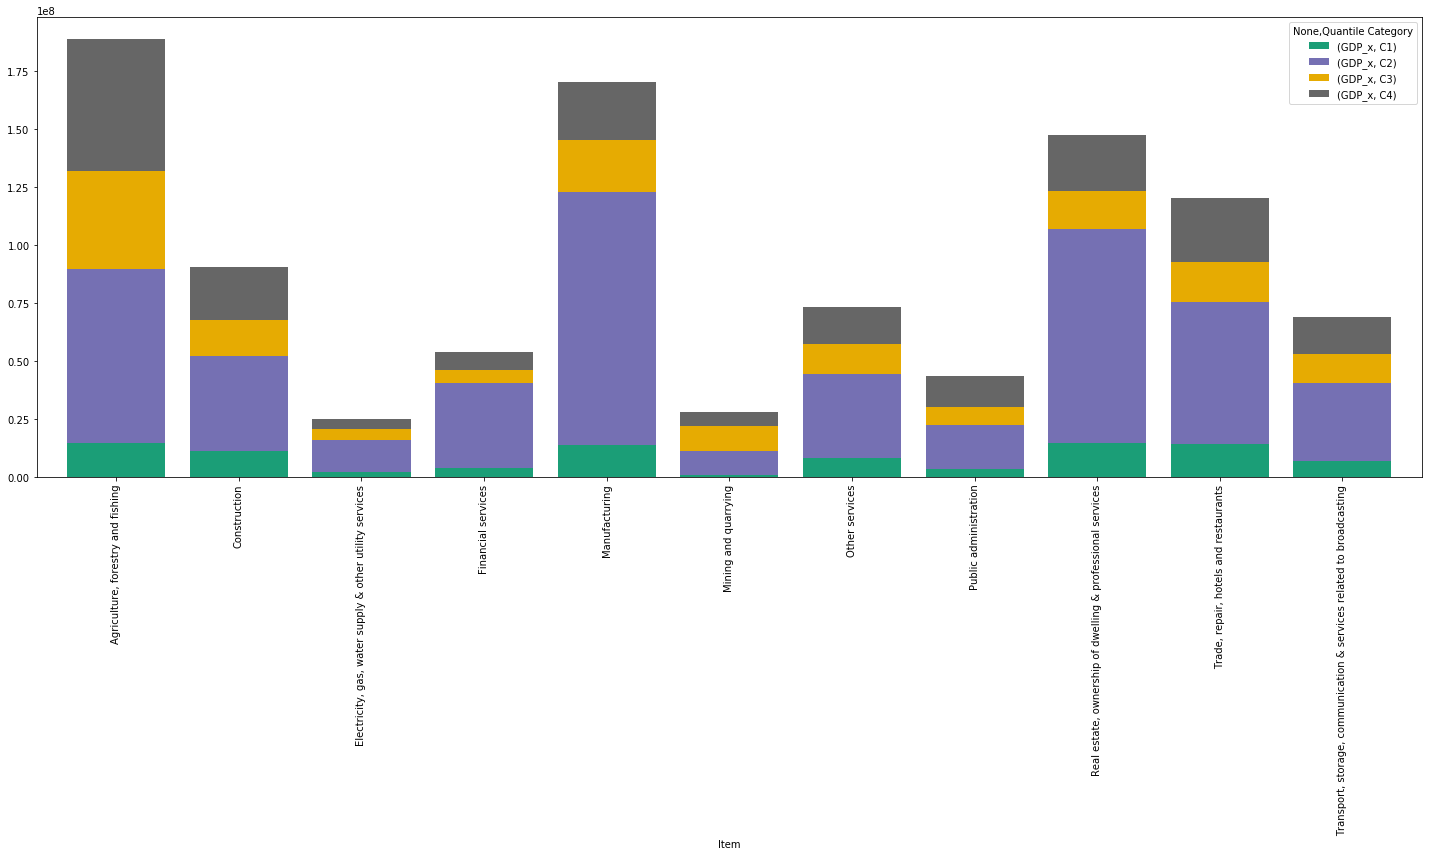

None
                                                                            GDP_x
Item                                               Quantile Category             
Transport, storage, communication & services re... C1                   6818560.0
                                                   C2                  33749808.0
                                                   C3                  12231484.0
                                                   C4                  16191800.0
Trade, repair, hotels and restaurants              C1                  13995159.0
                                                   C2                  61238862.0
                                                   C3                  17245309.0
                                                   C4                  27484595.0
Real estate, ownership of dwelling & profession... C1                  14740245.0
                                                   C2                  92121446.0
           

In [20]:
# Filter for GDP subsectors list
subsector = [10,20,30,40,50,60,70,80,90,100,110]

# Filter sub sector only from the Data Set
df_GDP_Flat_51 = df_GDP_Flat[df_GDP_Flat['S.No.'].isin(subsector)]

#Merging Dataframe based on states to get Category applied on Subsectors
df_GDP_Flat_51 = pd.merge(df_GDP_Flat_51,df_GDP_Flat_5, on="States")

#Creating Graph Specific dataframe 
df_GDP_Flat_510 = df_GDP_Flat_51[["Quantile Category","Item","GDP_x"]].groupby(['Item','Quantile Category']).agg('sum')
df_GDP_Flat_510 = df_GDP_Flat_510.sort_values(['Item','Quantile Category'], ascending=[False,True])

# Plot bar Chart
df_GDP_Flat_510.unstack().plot(kind='bar', stacked=True, sharey=False, sharex=True, subplots=False, legend=True, width=0.8, layout=(3,2), fontsize=10, grid=False, figsize=(20,12), colormap='Dark2')
plt.tight_layout()

print(plt.show())
print(df_GDP_Flat_510)

>
> ### 5.11. Top 5 Sub-Sector C1 that Contribute to approximately 80%
>
> **The Top 5 Sector of C1:**
> * Trade, repair, hotels and restaurants
> * Agriculture, forestry and fishing
> * Manufacturing
> * Construction
> * Real estate, ownership of dwelling & profession...
>

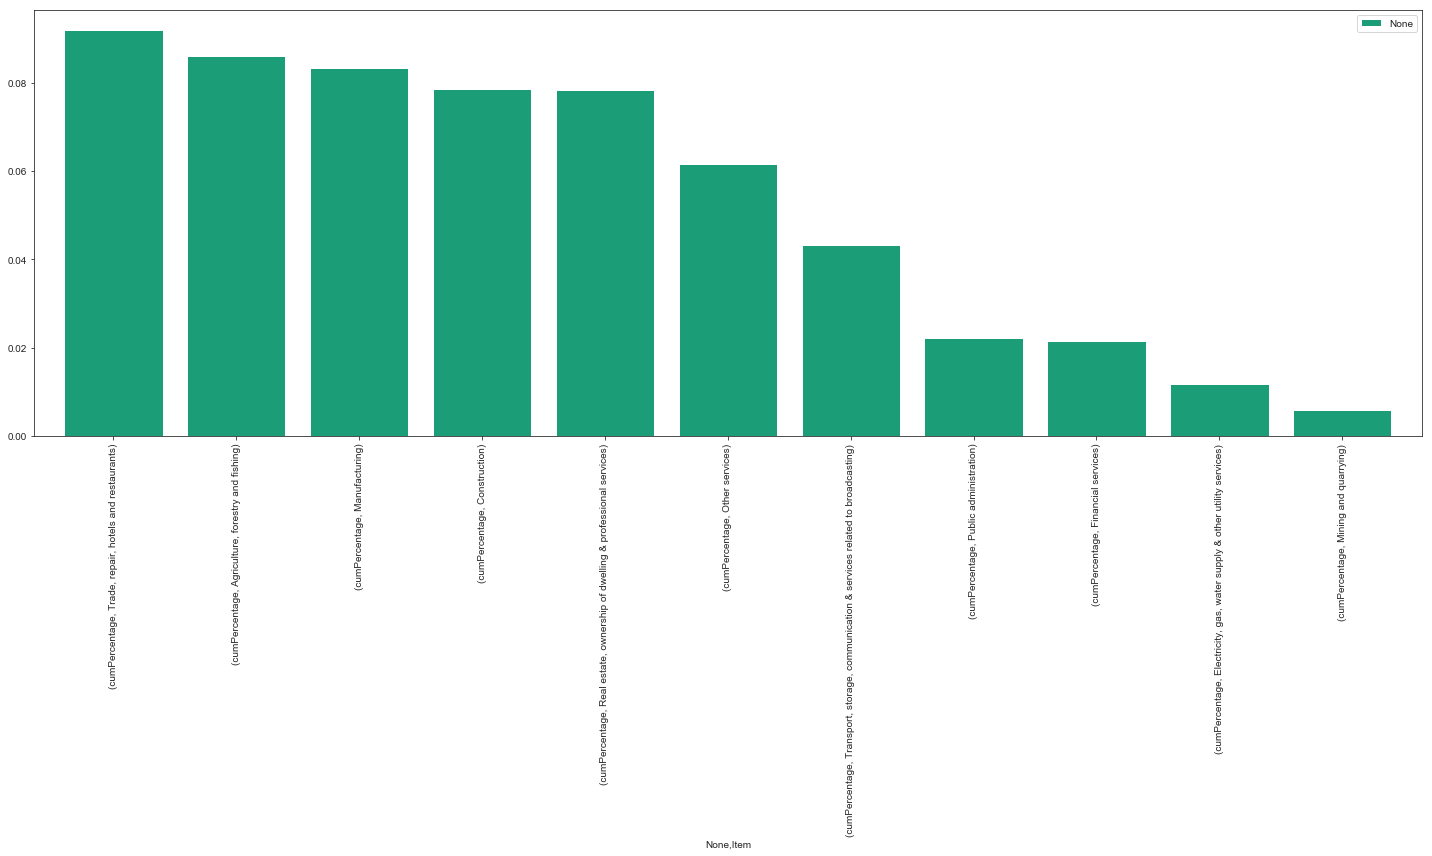

None
                                                    cumPercentage
Item                                                             
Trade, repair, hotels and restaurants                    0.091889
Agriculture, forestry and fishing                        0.086068
Manufacturing                                            0.083294
Construction                                             0.078538
Real estate, ownership of dwelling & profession...       0.078255
Other services                                           0.061515
Transport, storage, communication & services re...       0.043177
Public administration                                    0.022216
Financial services                                       0.021587
Electricity, gas, water supply & other utility ...       0.011832
Mining and quarrying                                     0.006001


In [30]:
# Filter for Catgagory list
category = ['C1']

# Filter Category only from the Data Set
df_GDP_Flat_511 = df_GDP_Flat_51[df_GDP_Flat_51['Quantile Category'].isin(category)]

#Calcualtion Cumulative GDP and Cumulative Percentage
GDP = df_GDP_Flat_511['GDP_x']
cumGDP = df_GDP_Flat_511['GDP_x'].sum()
Percentage = GDP/cumGDP

df_GDP_Flat_511.insert(2,'cumPercentage',Percentage)
df_GDP_Flat_511.cumPercentage.astype(float)

#Inserting Column Cumulative perentage
df_GDP_Flat_511 = df_GDP_Flat_511[['Item','cumPercentage','GDP_x']]

df_GDP_Flat_5111 = df_GDP_Flat_511[["Item","cumPercentage"]].groupby(["Item"]).agg('max')
df_GDP_Flat_5111 = df_GDP_Flat_5111.sort_values('cumPercentage', ascending=False)

# Plot bar Chart
df_GDP_Flat_5111.unstack().plot(kind='bar', stacked=False, sharey=False, sharex=True, subplots=False, legend=True, width=0.8, layout=(3,2), fontsize=10, grid=False, figsize=(20,12), colormap='Dark2')
plt.tight_layout()

print(plt.show())
print(df_GDP_Flat_5111)

>
> ### 5.12. Top 5 Sub-Sector C2 that Contribute to approximately 80%
> **The Top 5 Sector of C2:**
> * States under Category 2 haven't contributed more than 80%
>

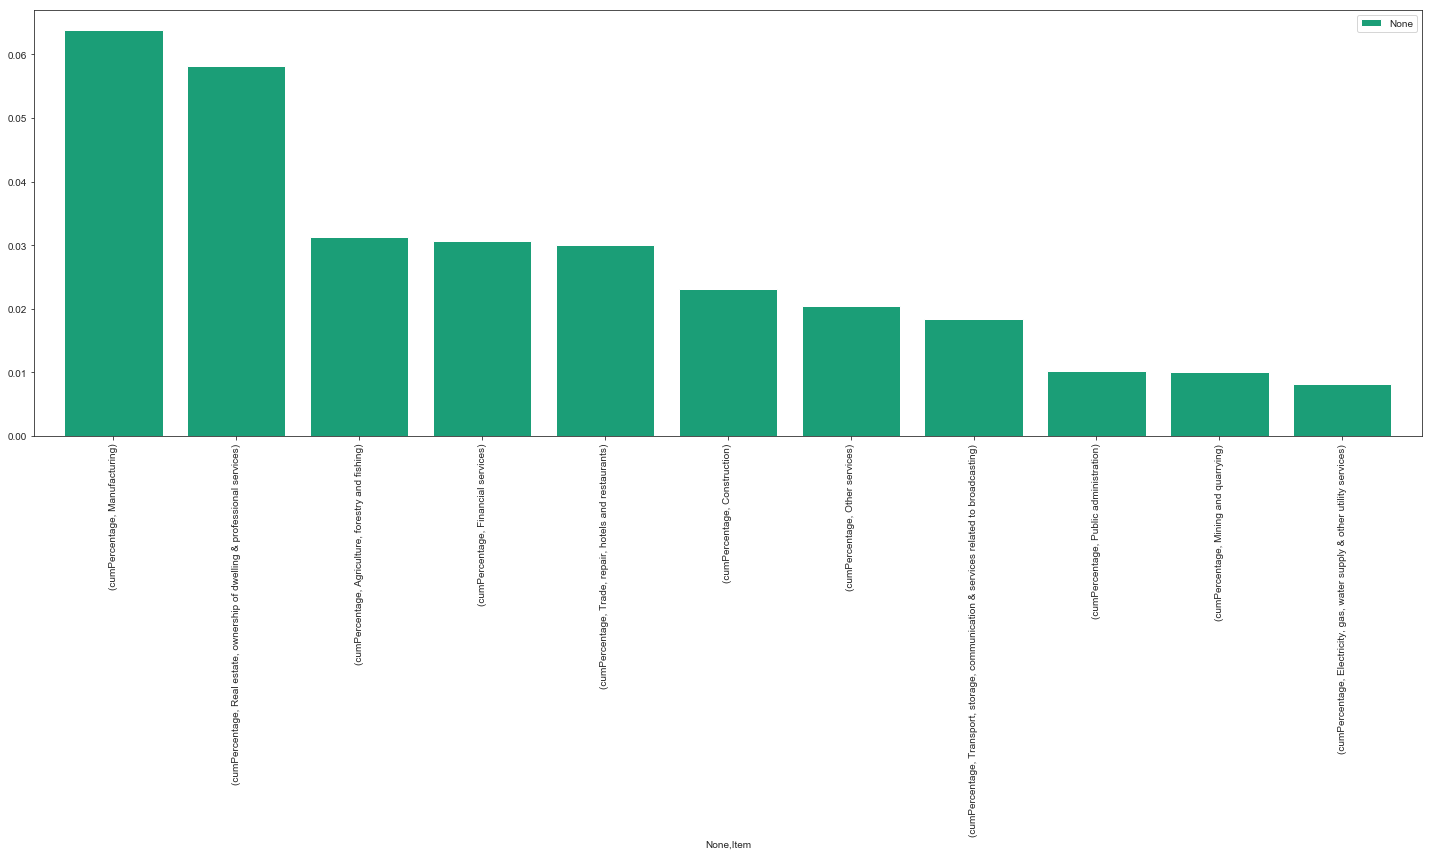

None
                                                    cumPercentage
Item                                                             
Manufacturing                                            0.063813
Real estate, ownership of dwelling & profession...       0.058235
Agriculture, forestry and fishing                        0.031234
Financial services                                       0.030604
Trade, repair, hotels and restaurants                    0.030028
Construction                                             0.023160
Other services                                           0.020487
Transport, storage, communication & services re...       0.018384
Public administration                                    0.010288
Mining and quarrying                                     0.010015
Electricity, gas, water supply & other utility ...       0.008218


In [31]:
# Filter for Catgagory list
category = ['C2']

# Filter Category only from the Data Set
df_GDP_Flat_512 = df_GDP_Flat_51[df_GDP_Flat_51['Quantile Category'].isin(category)]

#Calcualtion Cumulative GDP and Cumulative Percentage
GDP = df_GDP_Flat_512['GDP_x']
cumGDP = df_GDP_Flat_512['GDP_x'].sum()
Percentage = GDP/cumGDP

df_GDP_Flat_512.insert(2,'cumPercentage',Percentage)
df_GDP_Flat_512.cumPercentage.astype(float)

#Inserting Column Cumulative perentage
df_GDP_Flat_512 = df_GDP_Flat_512[['Item','cumPercentage','GDP_x']]

df_GDP_Flat_5122 = df_GDP_Flat_512[["Item","cumPercentage"]].groupby(["Item"]).agg('max')
df_GDP_Flat_5122 = df_GDP_Flat_5122.sort_values('cumPercentage', ascending=False)

# Plot bar Chart
df_GDP_Flat_5122.unstack().plot(kind='bar', stacked=False, sharey=False, sharex=True, subplots=False, legend=True, width=0.8, layout=(3,2), fontsize=10, grid=False, figsize=(20,12), colormap='Dark2')
plt.tight_layout()

print(plt.show())
print(df_GDP_Flat_5122)

>
> ### 5.13. Top 5 Sub-Sector C3 that Contribute to approximately 80%
> **The Top 5 Sector of C3:**
> * Trade, repair, hotels and restaurants 
> * Agriculture, forestry and fishing
> * Manufacturing
> * Construction
> * Real estate, ownership of dwelling & profession...
>

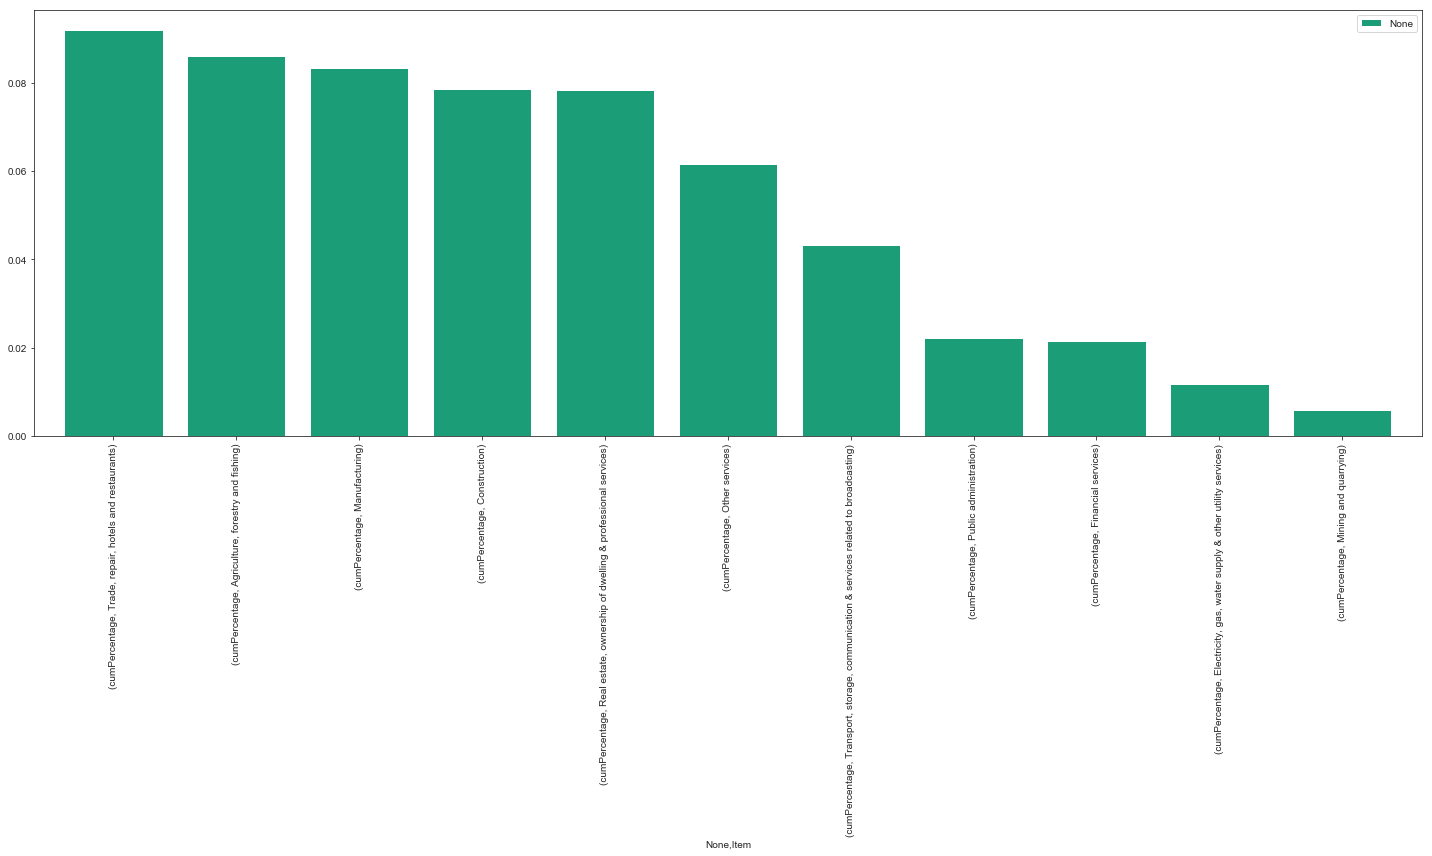

None
                                                    cumPercentage
Item                                                             
Trade, repair, hotels and restaurants                    0.091889
Agriculture, forestry and fishing                        0.086068
Manufacturing                                            0.083294
Construction                                             0.078538
Real estate, ownership of dwelling & profession...       0.078255
Other services                                           0.061515
Transport, storage, communication & services re...       0.043177
Public administration                                    0.022216
Financial services                                       0.021587
Electricity, gas, water supply & other utility ...       0.011832
Mining and quarrying                                     0.006001


In [32]:
# Filter for Catgagory list
category = ['C3']

# Filter Category only from the Data Set
df_GDP_Flat_513 = df_GDP_Flat_51[df_GDP_Flat_51['Quantile Category'].isin(category)]

#Calcualtion Cumulative GDP and Cumulative Percentage
GDP = df_GDP_Flat_513['GDP_x']
cumGDP = df_GDP_Flat_513['GDP_x'].sum()
Percentage = GDP/cumGDP

df_GDP_Flat_513.insert(2,'cumPercentage',Percentage)
df_GDP_Flat_513.cumPercentage.astype(float)

#Inserting Column Cumulative perentage
df_GDP_Flat_513 = df_GDP_Flat_511[['Item','cumPercentage','GDP_x']]

df_GDP_Flat_5133 = df_GDP_Flat_513[["Item","cumPercentage"]].groupby(["Item"]).agg('max')
df_GDP_Flat_5133 = df_GDP_Flat_5133.sort_values('cumPercentage', ascending=False)

# Plot bar Chart
df_GDP_Flat_5133.unstack().plot(kind='bar', stacked=False, sharey=False, sharex=True, subplots=False, legend=True, width=0.8, layout=(3,2), fontsize=10, grid=False, figsize=(20,12), colormap='Dark2')
plt.tight_layout()

print(plt.show())
print(df_GDP_Flat_5133)

>
> ### 5.14. Top 5 Sub-Sector C4 that Contribute to approximately 80%
> **The Top 5 Sector of C4:**
> * States Fall under Category 4 havent contribute to approx 80%
>

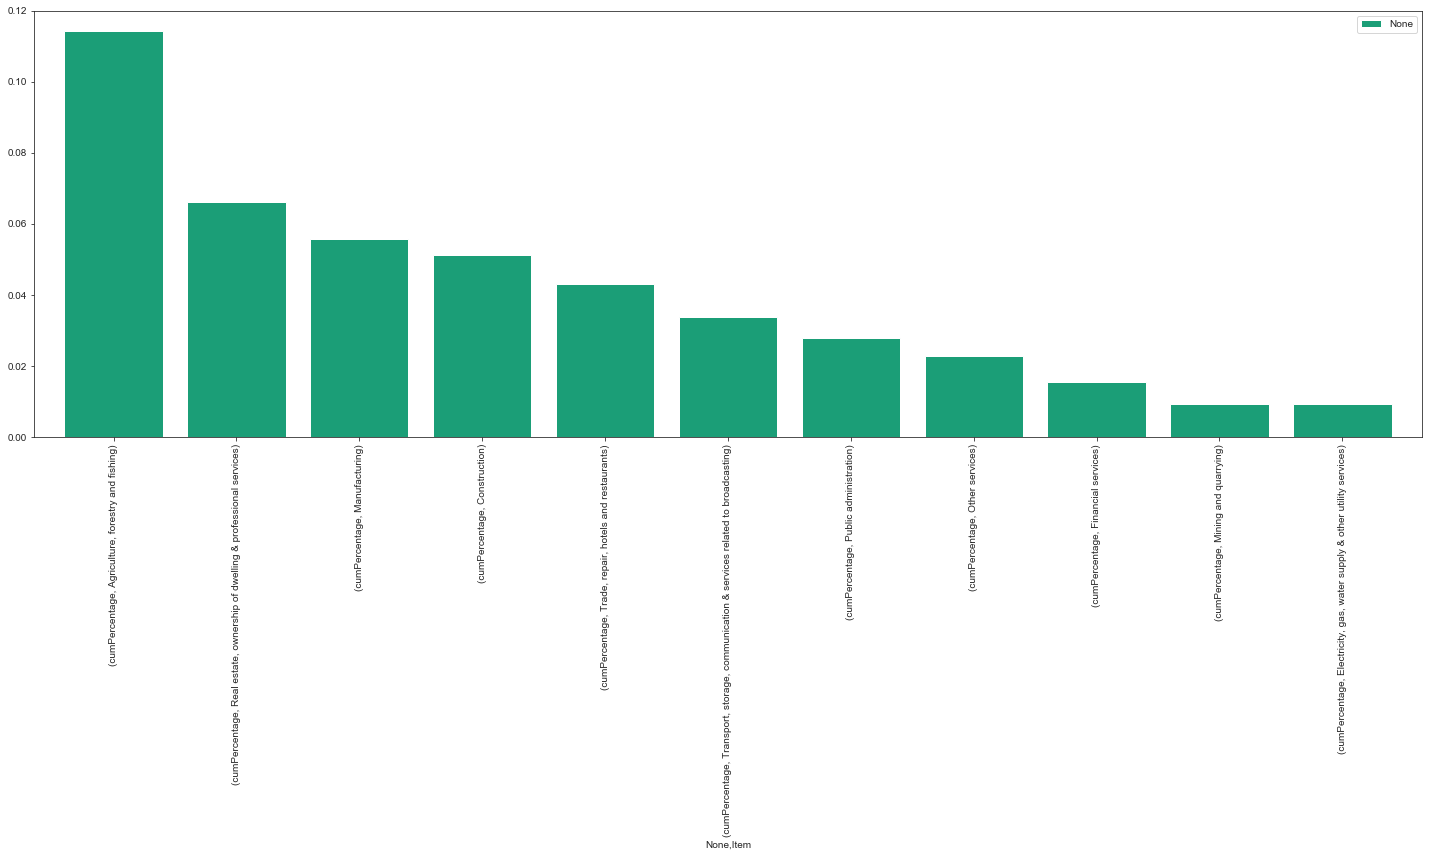

None
                                                    cumPercentage
Item                                                             
Agriculture, forestry and fishing                        0.114190
Real estate, ownership of dwelling & profession...       0.066192
Manufacturing                                            0.055788
Construction                                             0.051215
Trade, repair, hotels and restaurants                    0.042938
Transport, storage, communication & services re...       0.033689
Public administration                                    0.027991
Other services                                           0.022907
Financial services                                       0.015434
Mining and quarrying                                     0.009269
Electricity, gas, water supply & other utility ...       0.009239


In [33]:
# Filter for Catgagory list
category = ['C4']

# Filter Category only from the Data Set
df_GDP_Flat_514 = df_GDP_Flat_51[df_GDP_Flat_51['Quantile Category'].isin(category)]

#Calcualtion Cumulative GDP and Cumulative Percentage
GDP = df_GDP_Flat_514['GDP_x']
cumGDP = df_GDP_Flat_514['GDP_x'].sum()
Percentage = GDP/cumGDP

df_GDP_Flat_514.insert(2,'cumPercentage',Percentage)
df_GDP_Flat_514.cumPercentage.astype(float)

#Inserting Column Cumulative perentage
df_GDP_Flat_514 = df_GDP_Flat_514[['Item','cumPercentage','GDP_x']]

df_GDP_Flat_5144 = df_GDP_Flat_514[["Item","cumPercentage"]].groupby(["Item"]).agg('max')
df_GDP_Flat_5144 = df_GDP_Flat_5144.sort_values('cumPercentage', ascending=False)

# Plot bar Chart
df_GDP_Flat_5144.unstack().plot(kind='bar', stacked=False, sharey=False, sharex=True, subplots=False, legend=True, width=0.8, layout=(3,2), fontsize=10, grid=False, figsize=(20,12), colormap='Dark2')
plt.tight_layout()

print(plt.show())
print(df_GDP_Flat_5144)

>
> # Part-II: GDP and Education Dropout Rates
>

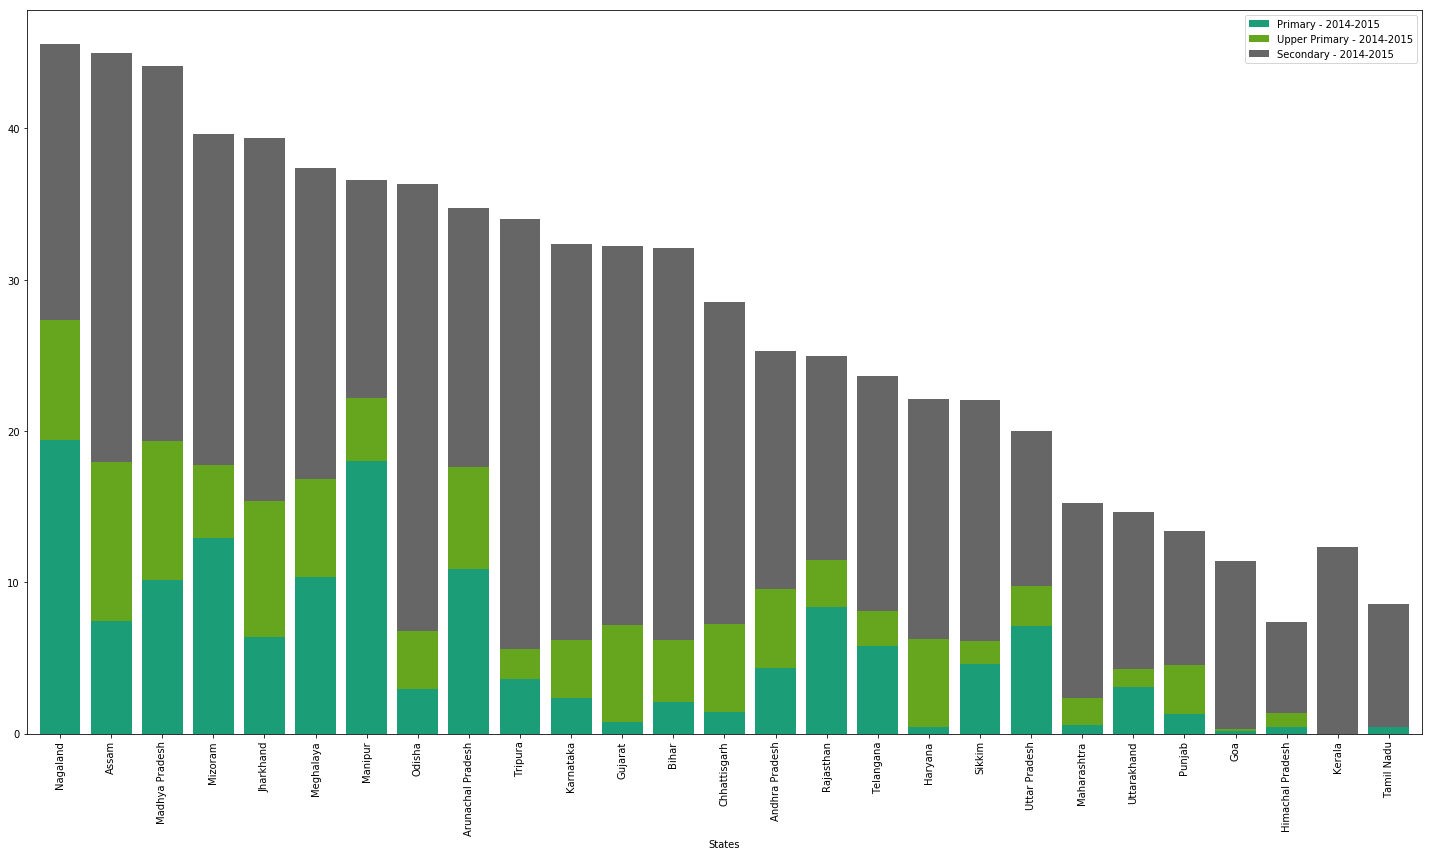

None
               States  Primary - 2014-2015  Upper Primary - 2014-2015  \
5            Nagaland                19.41                       7.92   
3               Assam                 7.44                      10.51   
8      Madhya Pradesh                10.14                       9.20   
9             Mizoram                12.96                       4.78   
26          Jharkhand                 6.41                       8.99   
14          Meghalaya                10.34                       6.52   
12            Manipur                18.00                       4.20   
2              Odisha                 2.94                       3.81   
11  Arunachal Pradesh                10.89                       6.71   
13            Tripura                 3.58                       1.99   
22          Karnataka                 2.32                       3.85   
23            Gujarat                 0.76                       6.41   
4               Bihar                 2.09    

In [25]:
# union Territories States exclude list
unionTerritories = ['Delhi','Chandigarh','A & N Islands','Daman & Diu', 'Dadra & Nagar Haveli','Puducherry','Lakshadweep','All India']
item = ['Per Capita GSDP (Rs.)']

# Reading Eduction Dropout CSV Files
df_Edu = pd.read_csv(LocationEDU, sep=",", encoding = "iso-8859-1", header=0,index_col ='Sl. No.')

#Selecting required column
df_Edu_2 = df_Edu[['Level of Education - State','Primary - 2014-2015','Upper Primary - 2014-2015','Secondary - 2014-2015']]

#Renaming Column
df_Edu_2.columns = ['States', 'Primary - 2014-2015','Upper Primary - 2014-2015','Secondary - 2014-2015'] 

#Excluuding Union Territories
df_Edu_2 = df_Edu_2[~df_Edu_2['States'].isin(unionTerritories)]
df_Edu_2 = df_Edu_2.sort_values('States', ascending=True)

# Calling Part I-B Dataset 
df_GDP_Flat_21 = df_GDP_Flat [df_GDP_Flat['Item'].isin(item)]

#Assiging States to States_GDP variable
states_GDP = df_GDP_Flat_21['States']

#verifiying missimath states and cleaning data
for index, row in df_Edu_2.iterrows():
    for i in states_GDP:
        if str.lower(row['States']) == str.lower(i):
            df_Edu_2.loc[df_Edu_2['States'].str.lower()==str.lower(i),'States']= i
        elif str.lower(row['States']) != str.lower(i):
            if set(str.lower(row['States'])) == set(str.lower(i)):
                df_Edu_2.loc[df_Edu_2['States'].str.lower().apply(set)==set(str.lower(i)),'States']= i

#Mergining both Part I-B and Part II Dataset  based on States
df_GDP_Edu_22 = pd.merge(df_GDP_Flat_21,df_Edu_2, on = "States", how='left')
df_GDP_Edu_220 = df_GDP_Edu_22[['States','Primary - 2014-2015','Upper Primary - 2014-2015','Secondary - 2014-2015']]

totals = df_GDP_Edu_220['Primary - 2014-2015'] + df_GDP_Edu_220['Upper Primary - 2014-2015'] + df_GDP_Edu_220['Secondary - 2014-2015']
df_GDP_Edu_220.insert(1,'Total',totals)
df_GDP_Edu_220 = df_GDP_Edu_220.sort_values('Total', ascending=False)

df_GDP_Edu_220 = df_GDP_Edu_220[['States','Primary - 2014-2015','Upper Primary - 2014-2015','Secondary - 2014-2015']]


# Plot bar Chart
df_GDP_Edu_220.plot(x='States',kind='bar', stacked=True, sharey=False, sharex=True, subplots=False, legend=True, width=0.8, layout=(3,2), fontsize=10, grid=False, figsize=(20,12), colormap='Dark2')
plt.tight_layout()

print(plt.show())
print(df_GDP_Edu_220)


>
> ## 2.1 Analyse if there is any correlation of GDP per capita with dropout rates in education (primary, upper primary and secondary) for the year 2014-2015 for each state. Choose an appropriate plot to conduct this analysis.
>

None
               States       GDP  Primary - 2014-2015
6                 Goa  271793.0                 0.20
16            Haryana  164077.0                 0.41
19         Tamil Nadu  146503.0                 0.46
25   Himachal Pradesh  147330.0                 0.46
24        Maharashtra  152853.0                 0.55
23            Gujarat  141263.0                 0.76
15             Punjab  126606.0                 1.29
10       Chhattisgarh   86860.0                 1.42
4               Bihar   33954.0                 2.09
22          Karnataka  145141.0                 2.32
2              Odisha   73979.0                 2.94
21        Uttarakhand  153076.0                 3.07
13            Tripura   77358.0                 3.58
18     Andhra Pradesh  104977.0                 4.35
20             Sikkim  240274.0                 4.57
1           Telangana  139035.0                 5.81
26          Jharkhand   62091.0                 6.41
17      Uttar Pradesh   49450.0          

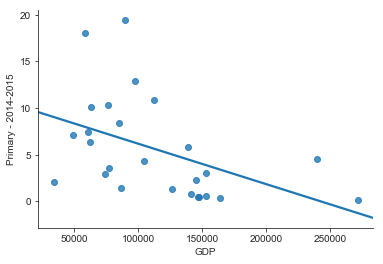

In [26]:
df_GDP_Edu_221 = df_GDP_Edu_22[["States","GDP","Primary - 2014-2015"]]
df_GDP_Edu_221 = df_GDP_Edu_221.sort_values('Primary - 2014-2015',ascending=True)

# Plot bar Chart
sns.set_style('ticks')
sns.regplot(df_GDP_Edu_221['GDP'], df_GDP_Edu_221['Primary - 2014-2015'], ci=None)
print(sns.despine()) 
print(df_GDP_Edu_221)


None
                        GDP  Upper Primary - 2014-2015
States                                                
Goa                271793.0                       0.07
Himachal Pradesh   147330.0                       0.87
Uttarakhand        153076.0                       1.19
Sikkim             240274.0                       1.57
Maharashtra        152853.0                       1.79
Tripura             77358.0                       1.99
Telangana          139035.0                       2.30
Uttar Pradesh       49450.0                       2.70
Rajasthan           84837.0                       3.07
Punjab             126606.0                       3.22
Odisha              73979.0                       3.81
Karnataka          145141.0                       3.85
Bihar               33954.0                       4.08
Manipur             58442.0                       4.20
Mizoram             97687.0                       4.78
Andhra Pradesh     104977.0                       5.20
Harya

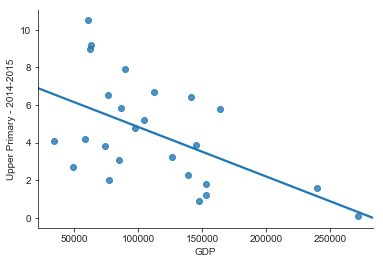

In [27]:
df_GDP_Edu_222 = df_GDP_Edu_22[["States","GDP","Upper Primary - 2014-2015"]].groupby(["States"]).max()
df_GDP_Edu_222 = df_GDP_Edu_222.sort_values('Upper Primary - 2014-2015',ascending=True)

# Plot bar Chart
sns.set_style('ticks')
sns.regplot(df_GDP_Edu_222['GDP'], df_GDP_Edu_222['Upper Primary - 2014-2015'], ci=None)
print(sns.despine()) 
print(df_GDP_Edu_222)

None
                        GDP  Secondary - 2014-2015
States                                            
Odisha              73979.0                  29.56
Tripura             77358.0                  28.42
Assam               60621.0                  27.06
Karnataka          145141.0                  26.18
Bihar               33954.0                  25.90
Gujarat            141263.0                  25.04
Madhya Pradesh      62989.0                  24.77
Jharkhand           62091.0                  24.00
Mizoram             97687.0                  21.88
Chhattisgarh        86860.0                  21.26
Meghalaya           76228.0                  20.52
Nagaland            89607.0                  18.23
Arunachal Pradesh  112718.0                  17.11
Haryana            164077.0                  15.89
Sikkim             240274.0                  15.89
Andhra Pradesh     104977.0                  15.71
Telangana          139035.0                  15.53
Manipur             58442.

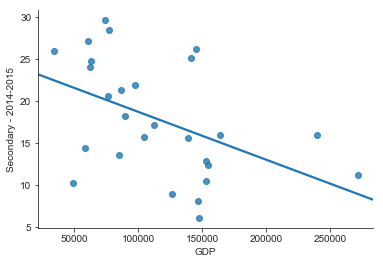

In [28]:
df_GDP_Edu_223 = df_GDP_Edu_22[["States","GDP","Secondary - 2014-2015"]].groupby(["States"]).max()
df_GDP_Edu_223 = df_GDP_Edu_223.sort_values('Secondary - 2014-2015',ascending=False)

# Plot bar Chart
sns.set_style('ticks')
sns.regplot(df_GDP_Edu_223['GDP'], df_GDP_Edu_223['Secondary - 2014-2015'], ci=None)
print(sns.despine()) 
print(df_GDP_Edu_223)